In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor

In [32]:
X = pd.read_csv('./X_opening.csv')
y = X['worldwide_gross']
X = X.drop('worldwide_gross',axis=1)

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=1)

In [34]:
model = DecisionTreeRegressor(max_depth=2)

In [35]:
model.fit(X_train,y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=2,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [36]:
import graphviz
from sklearn.tree import export_graphviz

In [37]:
treedot = export_graphviz(model, out_file = None, feature_names = X.columns)

In [38]:
treedot

'digraph Tree {\nnode [shape=box] ;\n0 [label="opening_gross <= 41613376.0\\nmse = 4.491994363696598e+16\\nsamples = 1665\\nvalue = 141540319.054"] ;\n1 [label="opening_gross <= 22074047.0\\nmse = 1.3333822193127812e+16\\nsamples = 1506\\nvalue = 92999937.199"] ;\n0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;\n2 [label="mse = 4923666241203536.0\\nsamples = 1257\\nvalue = 64781848.271"] ;\n1 -> 2 ;\n3 [label="mse = 3.147813101998761e+16\\nsamples = 249\\nvalue = 235450289.735"] ;\n1 -> 3 ;\n4 [label="opening_gross <= 70351576.0\\nmse = 1.1039811871593606e+17\\nsamples = 159\\nvalue = 601300162.289"] ;\n0 -> 4 [labeldistance=2.5, labelangle=-45, headlabel="False"] ;\n5 [label="mse = 4.067538845924512e+16\\nsamples = 92\\nvalue = 440868287.554"] ;\n4 -> 5 ;\n6 [label="mse = 1.2226485798747546e+17\\nsamples = 67\\nvalue = 821594676.851"] ;\n4 -> 6 ;\n}'

Parecida busqueda exhaustiva

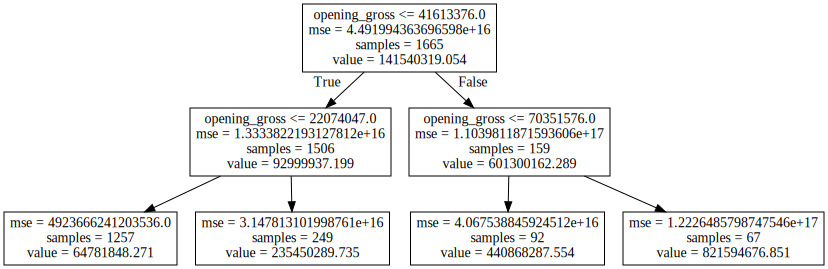

In [43]:
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files/release/bin'
graphviz.Source(treedot)

# Rando Forest

In [44]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection  import cross_validate

In [53]:
#n cantidades de arboles
n = 200
forest = RandomForestRegressor(n)
result = cross_validate(forest, X, y, cv=5, scoring='r2',return_train_score=True)

In [54]:
result

{'fit_time': array([4.24826479, 4.29069614, 4.44532013, 4.68648314, 4.49991918]),
 'score_time': array([0.05338717, 0.05689406, 0.05340028, 0.06863737, 0.06902456]),
 'test_score': array([0.47766647, 0.68213093, 0.56422017, 0.41302777, 0.44302655]),
 'train_score': array([0.96209642, 0.96645813, 0.96775251, 0.96501831, 0.96366054])}

Posiblemente overfitin

In [55]:
test_scores = result['test_score']
train_scores = result['train_score']
print(np.mean(train_scores))
print(np.mean(test_scores ))

0.9649971831790657
0.5160143785799584


# Gradient Boosted Trees

In [56]:
from sklearn.ensemble import GradientBoostingRegressor

Posiblemente overfitin

In [57]:
ensemble = GradientBoostingRegressor()
result = cross_validate(ensemble, X, y, cv=5, scoring='r2',return_train_score=True)

In [58]:
test_scores = result['test_score']
train_scores = result['train_score']
print(np.mean(train_scores))
print(np.mean(test_scores ))

0.9151392143549633
0.525071466691353
